Import Modules

In [1]:
import warnings

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import scipy as sp
import seaborn as sns
from PIL import Image
from plotly.subplots import make_subplots
import plotly.express as px

In [3]:
warnings.filterwarnings("ignore")

Read FIFA 19 dataset.

In [4]:
df = pd.read_csv(r"..\Datasets\data.csv", index_col="Unnamed: 0")

Data Visualisation

Calculate top 10 countries sorted by most players in the game<br>
group data by Nationality and sort it by number of players to get most countries having players.

In [5]:
national_players = (
    df[["Nationality", "ID"]]
    .groupby(by=["Nationality"], as_index=False)
    .count()
    .sort_values("ID", ascending=False)
)
national_players.rename(
    columns={"Nationality": "country", "ID": "player_count"}, inplace=True
)
national_players = national_players.reset_index()
national_players = national_players.drop(["index"], axis=1)

Slicing first 10 rows from country player_count dataset

In [6]:
player_count = national_players.iloc[0:10, 1]
nation = national_players.iloc[0:10, 0]

select seaborn style of chart to make display easy on the eyes.

In [7]:
temp_df = pd.DataFrame(
    list(zip(list(player_count), list(nation))), columns=["PlayerCount", "Nation"]
)
temp_df.to_csv(r"..\Outputs\MostPlayersNation.csv")
fig = px.bar(
    temp_df,
    x="Nation",
    y="PlayerCount",
    color="PlayerCount",
    title="Top Countries with Most Players",
)
fig.show()

Show Distribution of Age for all players<br>
slicing Age column and group it and count no. of players that have same age for all ages.

In [8]:
player_ages = (
    df[["Age", "ID"]]
    .groupby(by=["Age"], as_index=False)
    .count()
    .sort_values("ID", ascending=False)
)
player_ages.rename(columns={"ID": "count"}, inplace=True)
player_ages = player_ages.reset_index().drop(["index"], axis=1)

display histogram of age for all players and fit a normal distribution line for it.

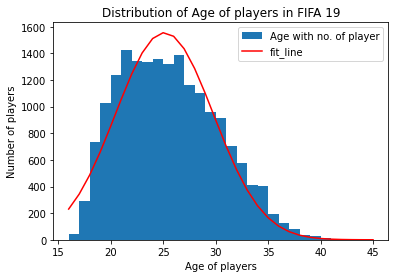

In [9]:
_, bins, _ = plt.hist(
    df.Age, bins=df.Age.max() - df.Age.min(), label="Age with no. of player"
)
mu, sigma = sp.stats.norm.fit(df.Age)
best_fit_line = sp.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, df.shape[0] * best_fit_line, label="fit_line", color="red")
plt.title("Distribution of Age of players in FIFA 19")
plt.ylabel("Number of players")
plt.xlabel("Age of players")
plt.legend()
plt.show()


Preferred foot analysis.<br>
count number of left and right foot preferred players

In [10]:
preferred_foot = df.groupby("Preferred Foot")[
    "Preferred Foot"].count().to_list()

In [11]:
temp_df = pd.DataFrame(
    list(zip(["Left", "Right"], preferred_foot)), columns=["Foot", "Count"]
)
temp_df.to_csv(r"..\Outputs\PreferredFootAnalysis.csv")
# plot pie chart to display the percentage for the preferred foot
fig = px.pie(temp_df, values="Count", names="Foot",
             title="Preferred Foot Analysis")
fig.update_traces(textposition="inside",
                  textinfo="percent+label", pull=[0.25, 0])
fig.show()

Show positions with the most number of players<br>
count number of players for every position in playground that have players and sort it.

In [12]:
player_position = (
    df[["Position", "ID"]]
    .groupby(by=["Position"], as_index=False)
    .count()
    .sort_values("ID", ascending=False)
)
player_position.rename(columns={"ID": "count"}, inplace=True)
player_position = player_position.reset_index().drop(["index"], axis=1)

plot bar chart to display the number of players for every position.

In [13]:
temp_df = pd.DataFrame(
    list(zip(list(player_position["Position"]),
         list(player_position["count"]))),
    columns=["Position", "Count"],
)
temp_df.to_csv(r"..\Outputs\PlayerPositionAnalysis.csv")
fig = px.bar(
    temp_df,
    x="Position",
    y="Count",
    color="Position",
    title="Player's Position Distribution",
)
fig.show()

Top 10 players for ST, GK, LW, RF Position

In [14]:
ST_position = df[df["Position"] == "ST"].sort_values("Overall", ascending=False)[
    ["Name", "Overall"]
]
ST_position = ST_position.iloc[:10, :]

In [15]:
GK_position = df[df["Position"] == "GK"].sort_values("Overall", ascending=False)[
    ["Name", "Overall"]
]
GK_position = GK_position.iloc[:10, :]

In [16]:
LW_position = df[df["Position"] == "LW"].sort_values("Overall", ascending=False)[
    ["Name", "Overall"]
]
LW_position = LW_position.iloc[:10, :]

In [17]:
RF_position = df[df["Position"] == "RF"].sort_values("Overall", ascending=False)[
    ["Name", "Overall"]
]
RF_position = RF_position.iloc[:10, :]

function to plot bar chart for top 10 players in selected positions.

In [18]:
def draw(df, color, position, ax):
    plt.style.use("tableau-colorblind10")
    sns.barplot(df["Name"], df["Overall"], color=color, ax=ax).set_title(
        "Top 10 " + position + " players", fontsize=14
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25)

plot 4 figures that display Top 10 players in ST, GK, LW, RF positions.

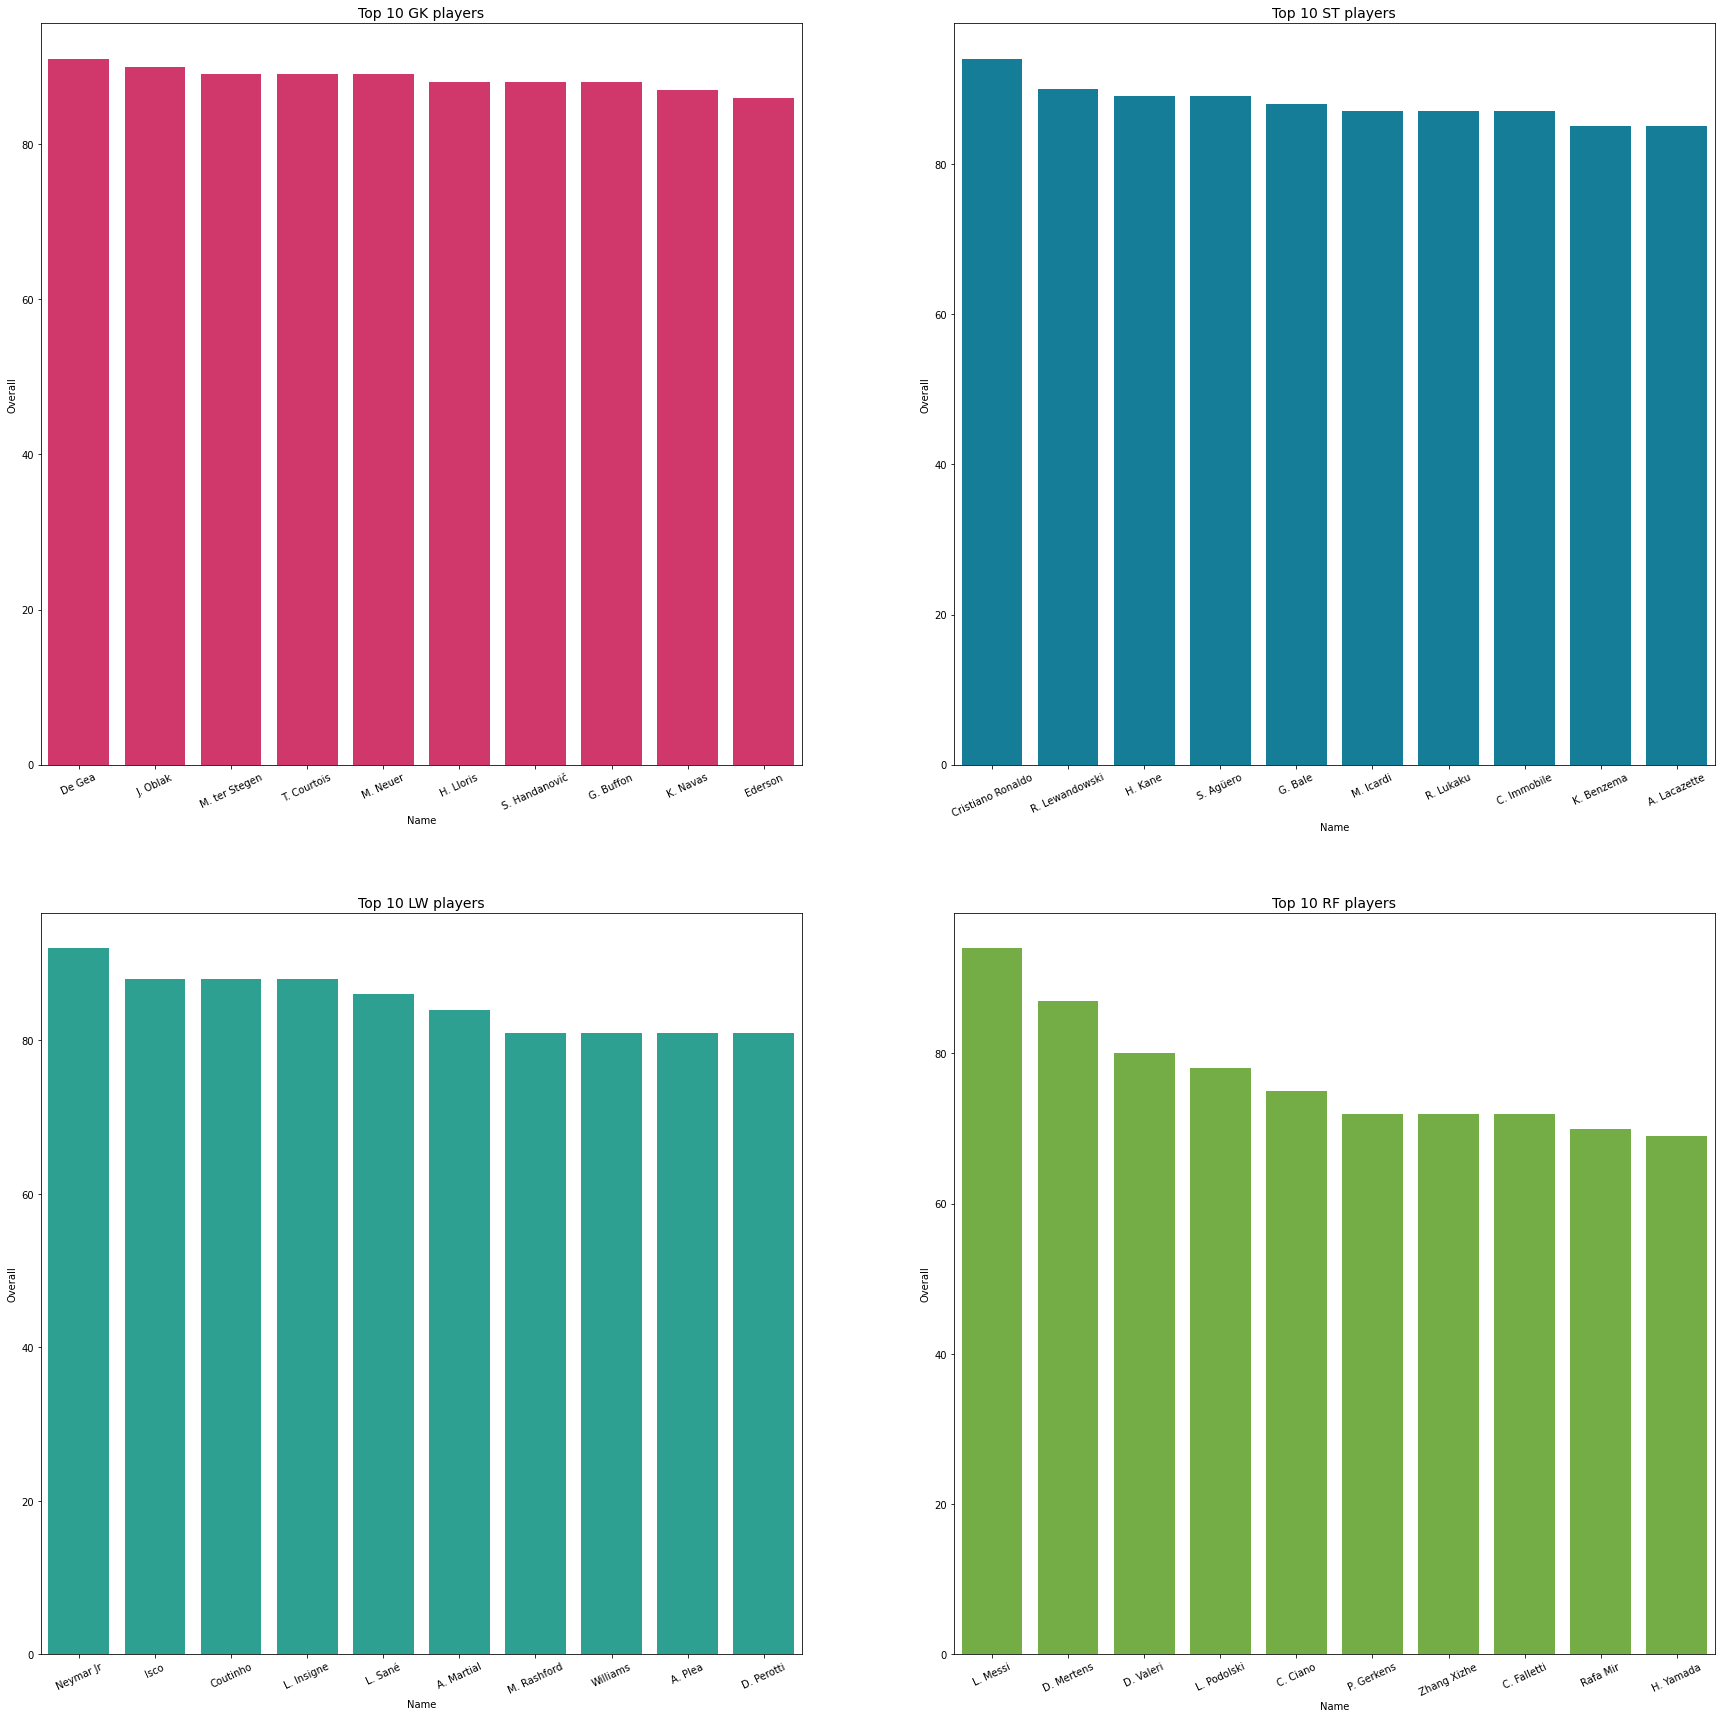

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[30, 30])
draw(GK_position, "#e91e63", "GK", axes[0, 0])
draw(ST_position, "#0089af", "ST", axes[0, 1])
draw(LW_position, "#1ab39f", "LW", axes[1, 0])
draw(RF_position, "#72bd35", "RF", axes[1, 1])
plt.show()


Distribution of all player's value and calculate The average value of players.<br>
function that converts value column of players to numeric.

In [20]:
def getValue(df):
    new = []
    for i in df:
        i = i.strip("€")
        if "K" in i:
            i = i.strip("K")
            new.append(float(i) * 1000)
        elif "M" in i:
            i = i.strip("M")
            new.append(float(i) * (10 ** 6))
        else:
            new.append(0.0)
    return new

convert value columns to numeric and calculate the average value.

In [21]:
lis = getValue(df.Value.values)
with open(r"..\Outputs\Report.txt", "w+") as f:
    data = (
        "The average value of players in the world = "
        + str(round(np.average(np.array(lis)) / 10 ** 6, 2))
        + "M"
    )
    f.write(data)
    f.write("\n")

Overall rating distribution and most fit line for it.<br>
plot the distribution of overall rating.

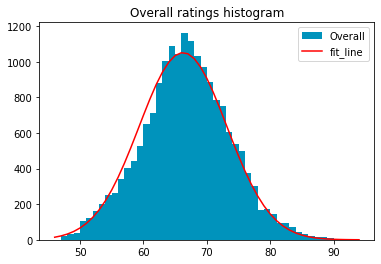

In [22]:
fig = px.histogram(
    df,
    x="Overall",
    color="Overall",
    title="Overall rating distribution for all players",
)
fig.show()
# plot the distribution of overall rating and get most fit line for it.
_, bins, _ = plt.hist(
    df.Overall,
    bins=(df.Overall.max() - df.Overall.min()),
    label="Overall",
    color="#0093bc",
)
mu, sigma = sp.stats.norm.fit(df.Overall)
best_fit_line = sp.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, df.shape[0] * best_fit_line, label="fit_line", color="red")
plt.title("Overall ratings histogram")
plt.legend()
plt.show()

Make Analysis for Real Madrid Club.<br>
select Real Madrid player from data

In [23]:
real_Madrid_players = df[df.Club == "Real Madrid"]
real_Madrid_players = real_Madrid_players[
    ["Name", "Age", "Nationality", "Value", "Release Clause", "Overall"]
]
real_Madrid_players.rename(columns={"Release Clause": "Release"}, inplace=True)

convert value column to numeric.

In [24]:
real_Madrid_players.Release = getValue(real_Madrid_players.Release)

sort them by Release column.

In [25]:
real_Madrid_players.sort_values("Release", inplace=True, ascending=False)
real_Madrid_players = real_Madrid_players.reset_index()
real_Madrid_players.drop("index", axis=1, inplace=True)

In [26]:
real_Madrid_players.to_csv(r"..\Outputs\RealMadridPlayers.csv")

In [27]:
with open(r"..\Outputs\Report.txt", "a+") as f:
    data = (
        "Overall mean value for Real Madrid Team = "
        + str(round(real_Madrid_players.Overall.mean()))
        + "%"
    )
    f.write(data)
    f.write("\n")
    data2 = "Release Corr. Overall= " + str(
        round(real_Madrid_players.Release.corr(real_Madrid_players.Overall), 2)
    )
    f.write(data2)
    f.write("\n")

plot chart for Release Values.

In [28]:
fig = px.bar(
    real_Madrid_players,
    x="Name",
    y="Release",
    color="Release",
    title="Real Madrid Release Values",
)
fig.show()
# Calculate the relation between weight and height for all players(corr. and distribution)
# function that convert weight to numeric.

In [29]:
def get_weight(weight):
    new = []
    for i in weight:
        if "lbs" in str(i):
            new.append(i.strip("lbs"))
    return new

function that convert height to numeric.

In [30]:
def get_height(height):
    new = []
    for i in height:
        if "'" in str(i):
            new.append(i.replace("'", "."))
    return new

drop nan values form weight and height columns and convert it to numeric.

In [31]:
weight_height = df[["Weight", "Height"]].dropna(how="any")
weight_height.Weight = get_weight(list(weight_height.Weight.values))
weight_height.Height = get_height(list(weight_height.Height.values))

plot scatter for  weight column.

In [32]:
weight_height.sort_values("Weight", ascending=True, inplace=True)
weight_height.Weight = weight_height.Weight.astype("float64")
weight_height.Height = weight_height.Height.astype("float64")
with open(r"..\Outputs\Report.txt", "a+") as f:
    data = "Correlation between Weight and Height of players = " + str(
        round(weight_height.Weight.corr(weight_height.Height), 2)
    )
    f.write(data)
    f.write("\n")

Top 10 expensive teams in the world<br>
drop nan from needed columns and group by Clubs and sort it by sum op player values.

In [33]:
club_value_df = df[["Club", "Release Clause"]].dropna(how="any")
club_value_df.columns = ["club", "value"]
club_value_df.value = getValue(club_value_df.value)
club_value_df = (
    club_value_df.groupby(by=["club"], as_index=False)
    .sum()
    .sort_values(by="value", ascending=False)
)
club_value_df.reset_index().drop(
    "index", axis=1).to_csv(r"..\Outputs\TopExpensive.csv")

plot most 10 team have expensive players.

In [34]:
fig = px.bar(
    club_value_df[:20],
    x="club",
    y="value",
    title="Top 20 most expensive teams in the world",
    color="value",
    labels={"club": "Clubs", "value": "Values"},
)
fig.show()
# Calculate ATTRIBUTE DETAILS for any player you want.
# attribute dictionary key attribute and values skills columns for every attribute.
attribute_dict = {
    "shooting": [
        "Positioning",
        "Finishing",
        "ShotPower",
        "LongShots",
        "Volleys",
        "Penalties",
    ],
    "passing": [
        "Vision",
        "Crossing",
        "FKAccuracy",
        "ShortPassing",
        "LongPassing",
        "Curve",
    ],
    "dribbling": [
        "Agility",
        "Balance",
        "Reactions",
        "BallControl",
        "Dribbling",
        "Composure",
    ],
    "defending": [
        "Interceptions",
        "HeadingAccuracy",
        "Marking",
        "StandingTackle",
        "SlidingTackle",
    ],
    "physical": ["Jumping", "Stamina", "Strength", "Aggression"],
}

function that calculate attribute for any player: need using player index

In [35]:
def calculate_attribute(dataframe, player_index):
    allcols = []
    for i in attribute_dict.values():
        allcols.extend(i)
    player_observation = dataframe.loc[player_index, allcols].astype("int64")
    player_skills = []
    for i in attribute_dict.keys():
        lis = attribute_dict.get(i)
        player_skills.append(
            int(sum(player_observation[lis]) / len(player_observation[lis]))
        )
    return {
        i.upper() + ": " + str(j) + "%": j
        for i, j in zip(attribute_dict.keys(), player_skills)
    }

function get skills values for any attribute.

In [36]:
def get_attributes_values(attribute, observation):
    return observation.loc[attribute_dict.get(attribute)].astype("int64")

function that plot player attribute: need index of player skills.

In [37]:
def plot_player_attribute(player_index, observation, skills):
    colors = ["#03a309", "#a3037e", "#fd3689", "#ded118", "#474bc9"]
    go.Figure()
    fig = make_subplots(rows=1, cols=5)
    # create skills bar chart
    for key, skill_name, color_i, column in zip(
        attribute_dict.keys(), skills, colors, range(1, 6)
    ):
        values = get_attributes_values(key, observation)
        fig.add_trace(
            go.Bar(
                x=values,
                y=attribute_dict.get(key),
                name=skill_name,
                marker=go.bar.Marker(
                    color=color_i, line=dict(color="#454545", width=1)
                ),
                orientation="h",
                width=0.5,
                text=values,
                textposition="auto",
            ),
            row=1,
            col=column,
        )

    # read image
    img = Image.open(r"..\faces/" + str(player_index) + ".png")
    # Add image
    fig.add_layout_image(
        dict(
            source=img,
            xref="paper",
            yref="paper",
            x=1,
            y=1.5,
            sizex=0.5,
            sizey=0.5,
            xanchor="right",
            yanchor="top",
        )
    )
    # update layout properties
    fig.update_layout(
        autosize=False,
        height=300,
        width=2300,
        bargap=0.5,
        bargroupgap=0.3,
        barmode="overlay",
        hovermode="x",
        margin=dict(r=0, l=0, b=0, t=100),
        title=(
            {
                "text": observation["Name"] + " Attribute Details",
                "y": 0.9,
                "x": 0.5,
                "xanchor": "right",
                "yanchor": "top",
            }
        ),
    )
    fig.update_xaxes(range=[0, 100])
    fig.show()

Player Attributes select player index form dataset<br>
draw attribute details for MESSI.

In [38]:
player_index = 0
player_skills = calculate_attribute(df, player_index)
plot_player_attribute(
    player_index, df.iloc[player_index], list(player_skills.keys()))

draw attribute details for RONALDO.

In [39]:
player_index = 1
player_skills = calculate_attribute(df, player_index)
plot_player_attribute(
    player_index, df.iloc[player_index], list(player_skills.keys()))

draw attribute details for Neymar Jr

In [40]:
player_index = 2
player_skills = calculate_attribute(df, player_index)
plot_player_attribute(
    player_index, df.iloc[player_index], list(player_skills.keys()))

draw attribute details for M.SALAH.

In [41]:
player_index = 26
player_skills = calculate_attribute(df, player_index)
plot_player_attribute(
    player_index, df.iloc[player_index], list(player_skills.keys()))

Radar Plot for player attribute's Details<br>
function plot radar diagram for any player, need player skills and player name.<br>
noinspection PyTypeChecker

In [42]:
def plot_player_radar(skills, player_name):
    fig = go.Figure()
    fig.add_trace(
        go.Scatterpolar(
            r=list(skills.values()),
            theta=list(skills.keys()),
            fill="toself",
            name=player_name,
            line_color="darkviolet",
        )
    )
    fig.update_layout(
        polar=dict(radialaxis=dict(visible=False, range=[0, 100])), showlegend=True
    )
    fig.show()

draw attribute Details radar chart for RONALDO.

In [43]:
player_index = 1
player_skills = calculate_attribute(df, player_index)
plot_player_radar(player_skills, df.iloc[player_index]["Name"])

draw attribute Details radar chart for M.SALAH.

In [44]:
player_index = 26
player_skills = calculate_attribute(df, player_index)
plot_player_radar(player_skills, df.iloc[player_index]["Name"])

Radar plot for player's skills.<br>
select player, skills columns and convert it to numeric.

In [45]:
player_index = 0
col = [
    "Crossing",
    "Finishing",
    "ShortPassing",
    "SprintSpeed",
    "Stamina",
    "Strength",
    "Vision",
    "Acceleration",
    "BallControl",
]
observation = df.loc[player_index, col].astype("int64")

use to concatenate skills with it's value.

In [46]:
categories = []
for i in col:
    categories.append(i + ": " + str(int(observation[i])) + "%")

plot MESSI skills radar.<br>
noinspection PyRedeclaration

In [47]:
fig = go.Figure()
# noinspection PyTypeChecker
fig.add_trace(
    go.Scatterpolar(
        r=observation,
        theta=categories,
        fill="toself",
        name=df.iloc[player_index]["Name"],
        line_color="red",
    )
)
fig.update_layout(
    polar=dict(radialaxis=dict(visible=False, range=[0, 100])), showlegend=True
)
fig.show()

Show the best squad in the world by choosing Lineup.<br>
player position in each line in playground.

In [48]:
position = {
    "defender": ["RB", "LB", "CB", "LCB", "RCB", "RWB", "RDM", "CDM", "LDM", "LWB"],
    "midfielder": ["RM", "LM", "CM", "LCM", "RCM", "RAM", "CAM", "LAM"],
    "attacker": ["RW", "RF", "CF", "LF", "LW", "RS", "ST", "LS"],
}
lineup = [3, 4, 3]

function that get best squad in the world based on your Lineup.

In [49]:
def get_best_squad(lineup):
    best_squad = (
        df[df.Position == "GK"].sort_values(
            "Overall", ascending=False).iloc[0:1]
    )
    for j, k in zip(position.keys(), range(3)):
        best = []
        for i in position.get(j):
            best.append(
                df[df.Position == i]
                .sort_values(["Overall", "Potential"], ascending=[False, False])
                .iloc[0]
            )
        best = pd.DataFrame(best).sort_values(
            ["Overall", "Potential"], ascending=[False, False]
        )
        best = best.iloc[0: lineup[k]]
        best_squad = pd.concat([best_squad, best])
    return best_squad

get best squad on the world based on lineup which you select.

In [50]:
best_squad = get_best_squad(lineup)
best_squad.reset_index(inplace=True)
player_index = list(
    best_squad.loc[:, ["index"]].values.reshape(
        11,
    )
)
best_squad.drop("index", axis=1, inplace=True)
best_squad.to_csv(r"..\Outputs\BestSquad.csv")

Plot the best squad on playground based on Lineup [3,4,3].<br>
location of player on chart.

In [51]:
location_3_4_3 = {
    0: [150, 80],
    1: [150, 145],
    2: [220, 145],
    3: [80, 145],
    4: [60, 300],
    5: [150, 230],
    6: [240, 300],
    7: [150, 320],
    8: [60, 400],
    9: [150, 450],
    10: [240, 400],
}
# Create figure
fig = go.Figure()

Constants

In [52]:
img_width = 900  # 900
img_height = 1200  # 1200
scale_factor = 0.4

add plot<br>
noinspection PyTypeChecker

In [53]:
fig.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0,
    )
)

# Configure axes
fig.update_xaxes(visible=False, range=[0, img_width * scale_factor])

# disable y-axis visible
fig.update_yaxes(visible=False, range=[
                 0, img_height * scale_factor], scaleanchor="x")

# add player image
for i in range(11):
    img = Image.open(r"..\faces/" + str(i) + ".png")
    fig.add_layout_image(
        dict(
            x=location_3_4_3[i][0],
            y=location_3_4_3[i][1],
            sizex=60,
            sizey=60,
            xref="x",
            yref="y",
            opacity=1.0,
            layer="above",
            source=img,
        )
    )
# Add background image
img = Image.open(r"..\field.jpg")
fig.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img,
    )
)
# Configure other layout
fig.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 50, "b": 0},
    title_font_size=15,
    title_font_family="Dosis",
    title=(
        {
            "text": "---Best Squad in The World for Lineup[3,4,3]---",
            "y": 0.95,
            "x": 0.5,
            "xanchor": "center",
            "yanchor": "top",
        }
    ),
)
fig.show()
